# Model Training

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR


In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
X = df.drop(columns=['math score'],axis=1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [14]:
y = df['math score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [15]:
# Create column Transformer. 
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler 

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("StandardScaler",numeric_transformer, num_feature),
        ("OneHotEncoder", oh_transformer,cat_feature),
    ]
)

In [16]:
X = preprocessor.fit_transform(X)

In [18]:
# Seperate dataset into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an evaluate function for performance metrics

In [37]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted),
    mse = mean_squared_error(true, predicted),
    r2 = r2_score(true, predicted)
    return mae, mse, r2   

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}

models_list=[]
r2_list=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)    
    
    model_train_mae , model_train_mse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_mse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model Performance on training data")
    print("r2_score: {}".format(model_train_r2))
    print("MAE: {}".format(model_train_mae))
    print("MSE: {}".format(model_train_mse))
    r2_list.append(model_train_r2)

    print('------------------------------------>')


    print("Model Performance on testing data")
    print("r2_score: {}".format(model_test_r2))
    print("MAE: {}".format(model_test_mae))
    print("MSE: {}".format(model_test_mse))
    r2_list.append(model_test_r2)

    print("="*35)
    print('\n')

Linear Regression
Model Performance on training data
r2_score: 0.8743172040139593
MAE: (4.266711846071956,)
MSE: (28.33487038064859,)
------------------------------------>
Model Performance on testing data
r2_score: 0.8804332983749565
MAE: (4.214763142474849,)
MSE: (29.095169866715466,)


Lasso
Model Performance on training data
r2_score: 0.8071466723085148
MAE: (5.206296077972952,)
MSE: (43.47829788272618,)
------------------------------------>
Model Performance on testing data
r2_score: 0.825320079562973
MAE: (5.157879138921816,)
MSE: (42.50633235127344,)


Ridge
Model Performance on training data
r2_score: 0.8743042615212909
MAE: (4.2649878237259795,)
MSE: (28.337788233082442,)
------------------------------------>
Model Performance on testing data
r2_score: 0.880593148502874
MAE: (4.211100688014259,)
MSE: (29.05627219234827,)


K-Neighbors Regressor
Model Performance on training data
r2_score: 0.8552410116072555
MAE: (4.51675,)
MSE: (32.635549999999995,)
---------------------------

In [39]:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False )

,Model,R2 Score
5,Random Forest Regressor,0.880593
1,Lasso,0.880433
0,Linear Regression,0.874317
4,Decision Tree,0.874304
6,XGBRegressor,0.855241
3,K-Neighbors Regressor,0.825320
2,Ridge,0.807147
7,AdaBoost Regressor,0.783770


In [40]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


<Axes: xlabel='math score'>

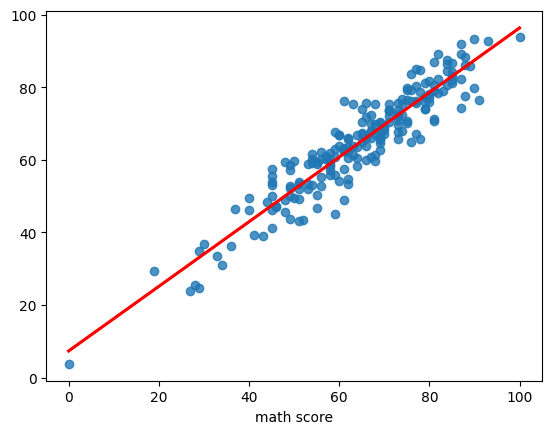

In [41]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, line_kws={"color": "red"})